### Problem Statement

Jamboree is a renowned educational institution that has successfully assisted numerous students in gaining admission to top colleges abroad. With their proven problem-solving methods, they have helped students achieve exceptional scores on exams like GMAT, GRE, and SAT with minimal effort. 

To further support students, Jamboree has recently introduced a new feature on their website. This feature enables students to assess their probability of admission to Ivy League colleges, considering the unique perspective of Indian applicants.
     
By conducting a thorough analysis, we can assist Jamboree in understanding the crucial factors impacting graduate admissions and their interrelationships. Additionally, we can provide predictive insights to determine an individual's admission chances based on various variables.

#### Exploratory Data Analysis

In [1]:
# Import the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [2]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
print(df.columns)

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')


In [5]:
# Rename the columns

df = df.rename(columns={"GRE Score": "GRE score", "TOEFL Score": "TOEFL score", "LOR ": "LOR", "Chance of Admit ": "chance of admit", "University Rating": "university rating", "Research": "research"})
print(df.columns)

Index(['Serial No.', 'GRE score', 'TOEFL score', 'university rating', 'SOP',
       'LOR', 'CGPA', 'research', 'chance of admit'],
      dtype='object')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE score          500 non-null    int64  
 2   TOEFL score        500 non-null    int64  
 3   university rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   research           500 non-null    int64  
 8   chance of admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [7]:
df.shape

(500, 9)

In [8]:
# As serial number is irrelevant for the analysis let's drop it.
df = df.drop('Serial No.', axis = 1)

In [9]:
# Statistical Summary of Numerical data
df.describe()

,GRE score,TOEFL score,university rating,SOP,LOR,CGPA,research,chance of admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


#### Univariate Analysis

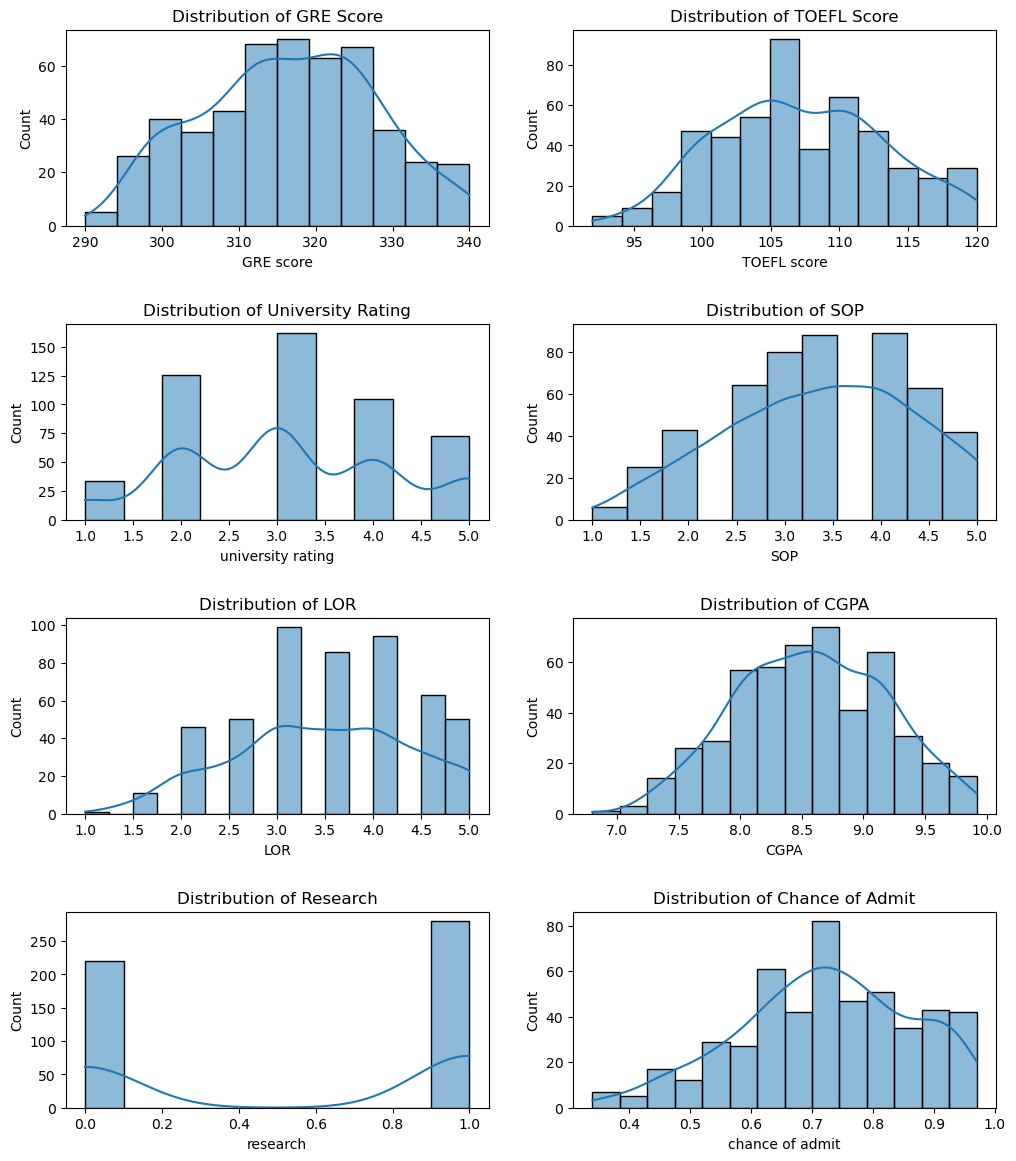

In [10]:
# Let's check the distribution of all the features using univariate analysis
plt.figure(figsize = (12,14))

#subplot 1
plt.subplot(4,2,1)
sns.histplot(x= df['GRE score'], kde = True)
plt.title('Distribution of GRE Score')

#subplot 2
plt.subplot(4,2,2)
sns.histplot(x= df['TOEFL score'], kde = True)
plt.title('Distribution of TOEFL Score')

#subplot 3
plt.subplot(4,2,3)
sns.histplot(x= df['university rating'], kde = True)
plt.title('Distribution of University Rating')

#subplot 4
plt.subplot(4,2,4)
sns.histplot(x= df['SOP'], kde = True)
plt.title('Distribution of SOP')

#subplot 5
plt.subplot(4,2,5)
sns.histplot(x= df['LOR'], kde = True)
plt.title('Distribution of LOR')

#subplot 6
plt.subplot(4,2,6)
sns.histplot(x= df['CGPA'], kde = True)
plt.title('Distribution of CGPA')

#subplot 7
plt.subplot(4,2,7)
sns.histplot(x= df['research'], kde = True)
plt.title('Distribution of Research')

#subplot 8
plt.subplot(4,2,8)
sns.histplot(x= df['chance of admit'], kde = True)
plt.title('Distribution of Chance of Admit')

plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

#### Correlation Analysis

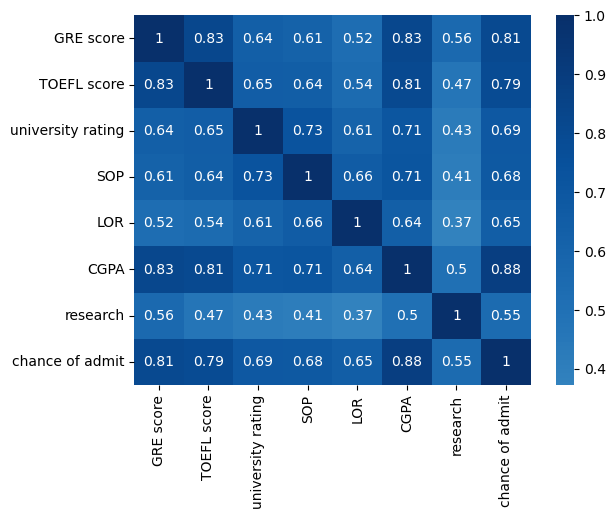

In [11]:
# Lets check how the features are inter-related

sns.heatmap(df.corr(), annot=True, center=0, cmap = 'Blues')
plt.show()

#### Bivariate Analysis

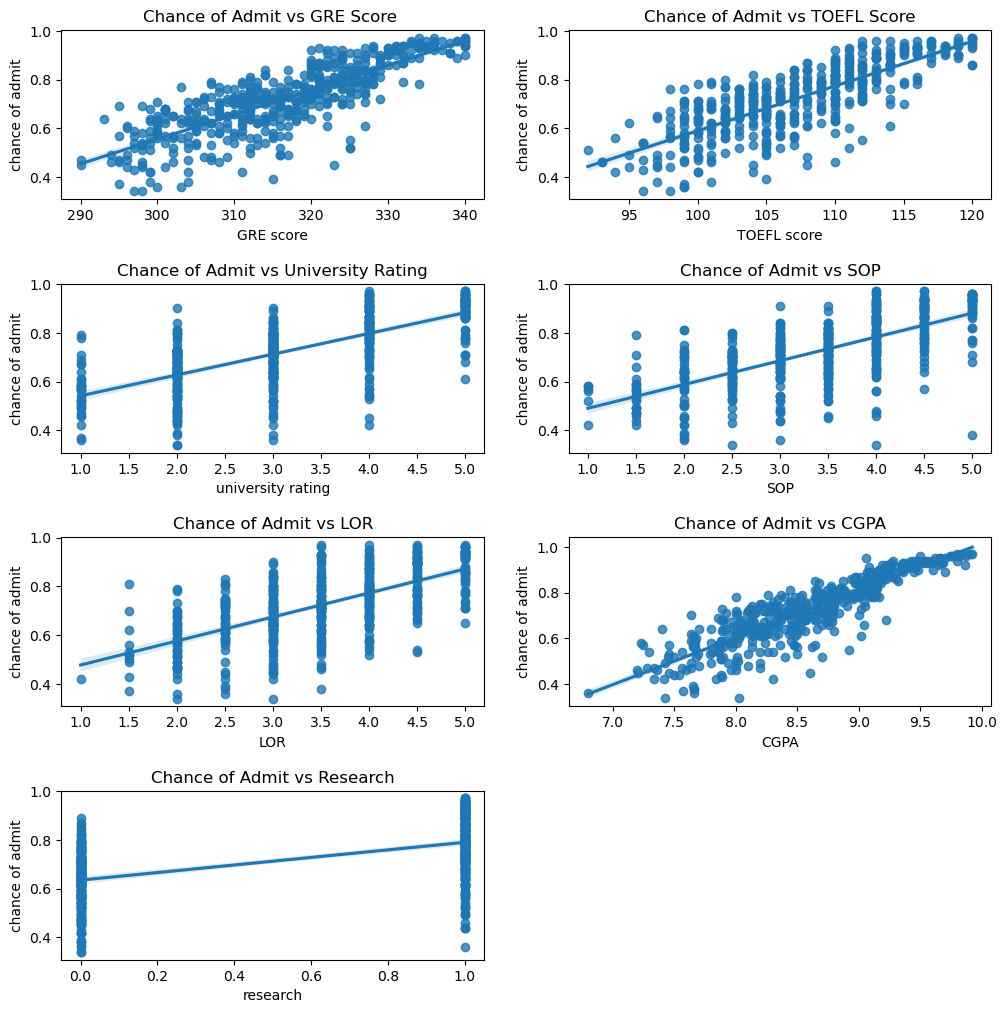

In [12]:
# lets perform the bivariate analysis among necessary varaiables

plt.figure(figsize = (12,45))

plt.subplot(14,2,1)
sns.regplot(data = df, x ='GRE score', y='chance of admit')
plt.title('Chance of Admit vs GRE Score ')

plt.subplot(14,2,2)
sns.regplot(data = df, x ='TOEFL score', y='chance of admit')
plt.title('Chance of Admit vs TOEFL Score')

plt.subplot(14,2,3)
sns.regplot(data = df, x ='university rating', y='chance of admit')
plt.title('Chance of Admit vs University Rating')

plt.subplot(14,2,4)
sns.regplot(data = df, x ='SOP', y='chance of admit')
plt.title('Chance of Admit vs SOP')

plt.subplot(14,2,5)
sns.regplot(data = df, x ='LOR', y='chance of admit')
plt.title('Chance of Admit vs LOR')

plt.subplot(14,2,6)
sns.regplot(data = df, x ='CGPA', y='chance of admit')
plt.title('Chance of Admit vs CGPA')

plt.subplot(14,2,7)
sns.regplot(data = df, x ='research', y='chance of admit')
plt.title('Chance of Admit vs Research')

######################################################################

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

A linear trend is followed between the independent and dependent variables

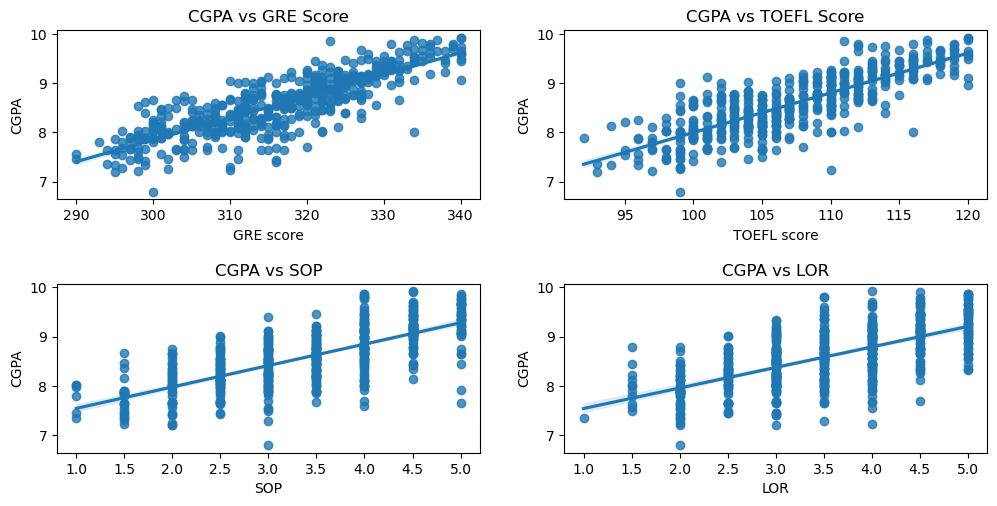

In [13]:
plt.figure(figsize = (12,45))

plt.subplot(14,2,1)
sns.regplot(data = df, x ='GRE score', y='CGPA')
plt.title('CGPA vs GRE Score')

plt.subplot(14,2,2)
sns.regplot(data = df, x ='TOEFL score', y='CGPA')
plt.title('CGPA vs TOEFL Score')

plt.subplot(14,2,3)
sns.regplot(data = df, x ='SOP', y='CGPA')
plt.title('CGPA vs SOP')

plt.subplot(14,2,4)
sns.regplot(data = df, x ='LOR', y='CGPA')
plt.title('CGPA vs LOR')

####################################################################
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()



Although there are exceptions, people with higher CGPA usually have higher GRE scores maybe because they are smart or hard working

LORs are not that related with CGPA so it is clear that a persons LOR is not dependent on that persons academic excellence. Having research experience is usually related with a good LOR which might be justified by the fact that supervisors have personal interaction with the students performing research which usually results in good LORs

CGPA and SOP are not that related because Statement of Purpose is related to academic performance, but since people with good CGPA tend to be more hard working so they have good things to say in their SOP which might explain the slight move towards higher CGPA as along with good SOPs

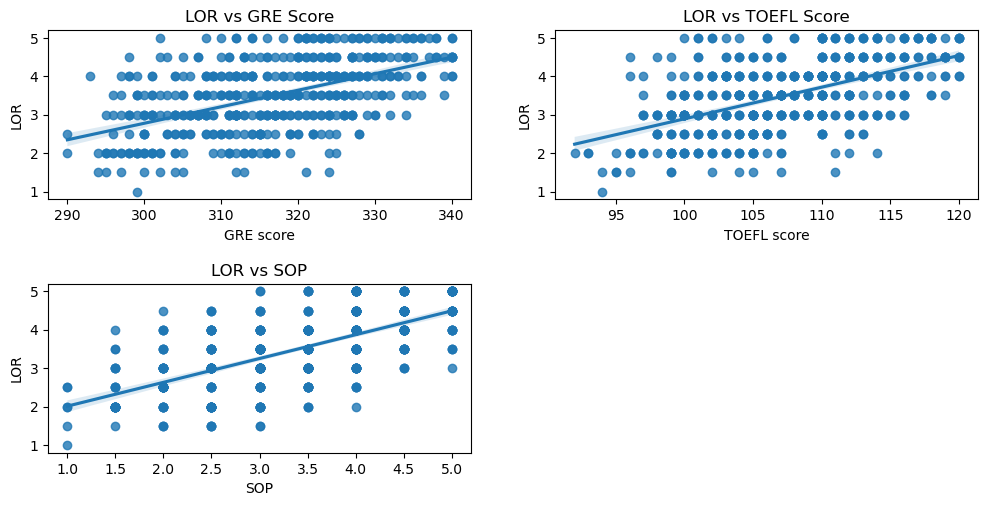

In [14]:
plt.figure(figsize = (12,45))

plt.subplot(14,2,1)
sns.regplot(data = df, x ='GRE score', y='LOR')
plt.title('LOR vs GRE Score')

plt.subplot(14,2,2)
sns.regplot(data = df, x ='TOEFL score', y='LOR')
plt.title('LOR vs TOEFL Score')

plt.subplot(14,2,3)
sns.regplot(data = df, x ='SOP', y='LOR')
plt.title('LOR vs SOP')

######################################################################
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()


GRE and TOEFL scores and LORs are also not that related. People with different kinds of LORs have all kinds of GRE scores

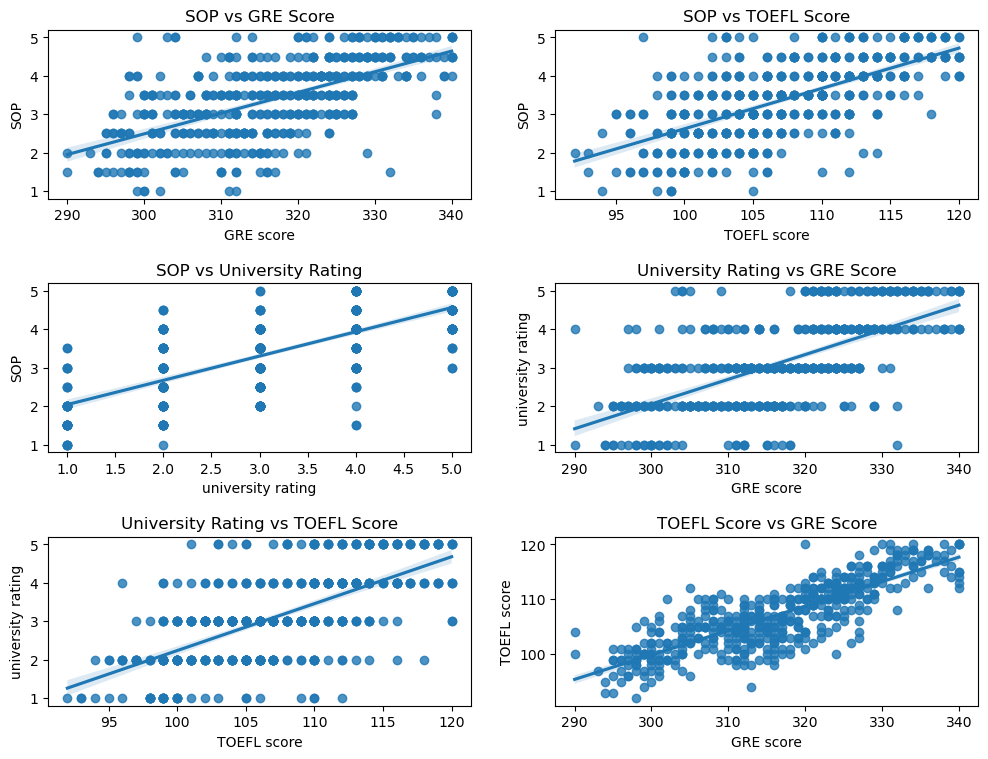

In [15]:
plt.figure(figsize = (12,45))

plt.subplot(14,2,1)
sns.regplot(data = df, x ='GRE score', y='SOP')
plt.title('SOP vs GRE Score')

plt.subplot(14,2,2)
sns.regplot(data = df, x ='TOEFL score', y='SOP')
plt.title('SOP vs TOEFL Score')

plt.subplot(14,2,3)
sns.regplot(data = df, x ='university rating', y='SOP')
plt.title('SOP vs University Rating')

###########################################################################

plt.subplot(14,2,4)
sns.regplot(data = df, x ='GRE score', y='university rating')
plt.title('University Rating vs GRE Score')

plt.subplot(14,2,5)
sns.regplot(data = df, x ='TOEFL score', y='university rating')
plt.title('University Rating vs TOEFL Score')

############################################################################

plt.subplot(14,2,6)
sns.regplot(data = df, x ='GRE score', y='TOEFL score')
plt.title('TOEFL Score vs GRE Score')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

People with higher GRE Scores also have higher TOEFL Scores which is justified because both TOEFL and GRE have a verbal section which although not similar are relatable

GRE Score and CGPA is only slightly related

Applicants with different kinds of SOP have different kinds of TOEFL Score. So the quality of SOP is not always related to the applicants English skills.

#### Data Pre-Processing

In [16]:
# check for duplicates
df.duplicated().sum()

0

There are no duplicate values in the dataset

In [17]:
#check for missing values
df.isna().sum()

GRE score            0
TOEFL score          0
university rating    0
SOP                  0
LOR                  0
CGPA                 0
research             0
chance of admit      0
dtype: int64

There are no null values in the dataset

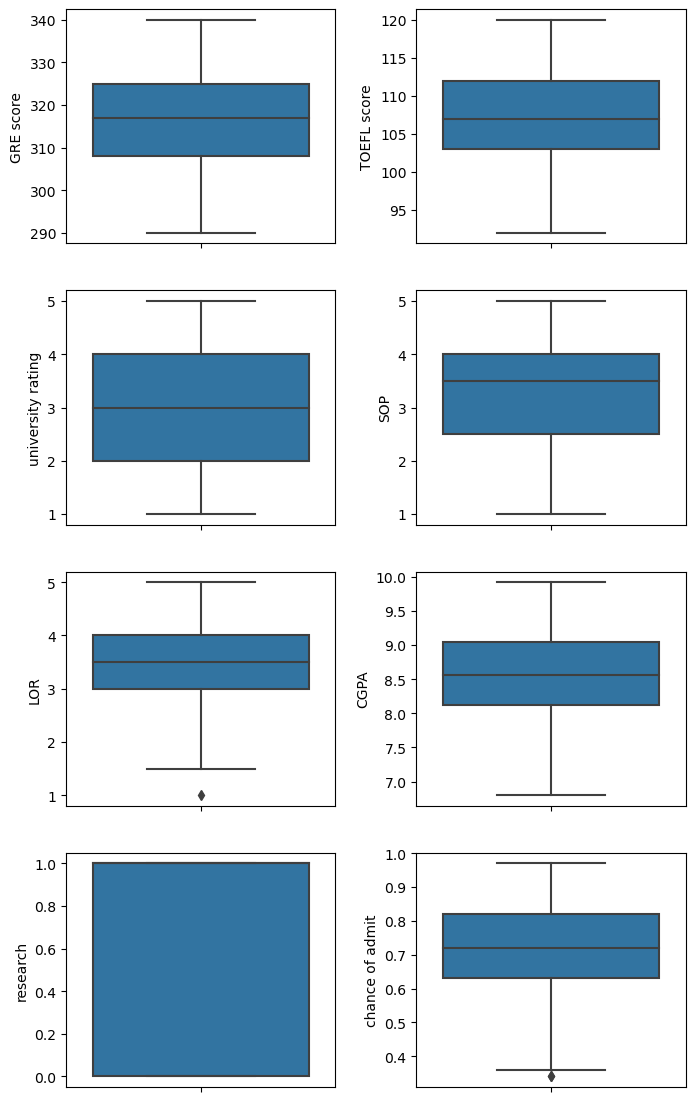

In [18]:
# check for outliers
plt.figure(figsize = (8,14))

plt.subplot(4,2,1)
sns.boxplot(data = df, y='GRE score', orient ='v')

plt.subplot(4,2,2)
sns.boxplot(data = df, y='TOEFL score', orient ='v')

plt.subplot(4,2,3)
sns.boxplot(data = df, y='university rating', orient ='v')

plt.subplot(4,2,4)
sns.boxplot(data = df, y='SOP', orient ='v')

plt.subplot(4,2,5)
sns.boxplot(data = df, y='LOR', orient ='v')

plt.subplot(4,2,6)
sns.boxplot(data = df, y='CGPA', orient ='v')

plt.subplot(4,2,7)
sns.boxplot(data = df, y='research', orient ='v')

plt.subplot(4,2,8)
sns.boxplot(data = df, y='chance of admit', orient ='v')

plt.subplots_adjust(wspace=0.3, hspace=0.2)
plt.show()

There are negligible outliers in the dataset and also the data points are just 500 so in order to not lost the data, lets not drop these outliers

#### Data preparation for modelling

In [19]:
# Define X and y

y = df['chance of admit']
X = df.drop('chance of admit', axis=1)
y.shape, X.shape

((500,), (500, 7))

In [20]:
# Lets split the dataset with training and testing set and prepare the inputs and outputs

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [21]:
X_train.shape, y_train.shape

((400, 7), (400,))

In [22]:
X_test.shape, y_test.shape

((100, 7), (100,))

In [23]:
# Standardization of X_train and X_test

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_train_scaled.head()

,GRE score,TOEFL score,university rating,SOP,LOR,CGPA,research
0,-0.53736,-0.519491,-0.054636,-1.337783,0.009331,-0.326582,-1.111142
1,0.16364,0.449257,-1.802983,-0.845045,0.009331,-0.045935,0.899975
2,-1.41361,-1.003865,-0.054636,0.140430,-1.057098,-1.135504,-1.111142
3,-1.41361,-1.326781,-1.802983,-0.352308,-1.590312,-2.918435,0.899975
4,0.51414,-0.519491,-0.054636,0.140430,0.542546,0.449323,0.899975


In [24]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
X_test_scaled.head()

,GRE score,TOEFL score,university rating,SOP,LOR,CGPA,research
0,-0.274485,-0.196575,-0.928809,-0.845045,-1.590312,-0.227530,-1.111142
1,-0.362110,-0.035117,-0.054636,-0.352308,-0.523883,-0.178004,0.899975
2,2.003764,1.902379,1.693711,1.125906,0.542546,1.869065,-1.111142
3,-0.011610,-0.035117,-0.928809,0.140430,0.009331,0.119151,0.899975
4,0.777014,0.449257,0.819538,1.125906,0.542546,0.647427,0.899975


In [25]:
# Linear Regression model building

model = LinearRegression()

In [26]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [27]:
model.coef_

array([0.02091007, 0.01965792, 0.00701103, 0.00304937, 0.01352815,
       0.07069295, 0.00988992])

In [28]:
model.intercept_

0.7209250000000001

### check the assumptions of linear regression

#### 1. Multi-colinearity

In [29]:
def calculate_vif(dataset, col):
    dataset = dataset.drop(columns = col, axis = 1)
    vif = pd.DataFrame()
    vif['features'] = dataset.columns
    vif['vif_value'] = [variance_inflation_factor(dataset.values, i) for i in range (dataset.shape[1])]
    vif = vif.sort_values(by = "vif_value", ascending = False)
    return vif

In [30]:
calculate_vif(X_train_scaled, [])

,features,vif_value
0,GRE score,4.880395
5,CGPA,4.750569
1,TOEFL score,4.257316
3,SOP,2.919283
2,university rating,2.801419
4,LOR,2.081769
6,research,1.507890


VIF looks good as it is less than 5 for all features, hence the dataset has minimal multi-collinearity.

#### 2. Mean of residuals

In [31]:
y_pred = model.predict(X_test_scaled)

In [32]:
residuals = (y_test - y_pred)
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -0.005706590389232276


Mean of residuals is almost close to zero

#### 3. Linear relationship 

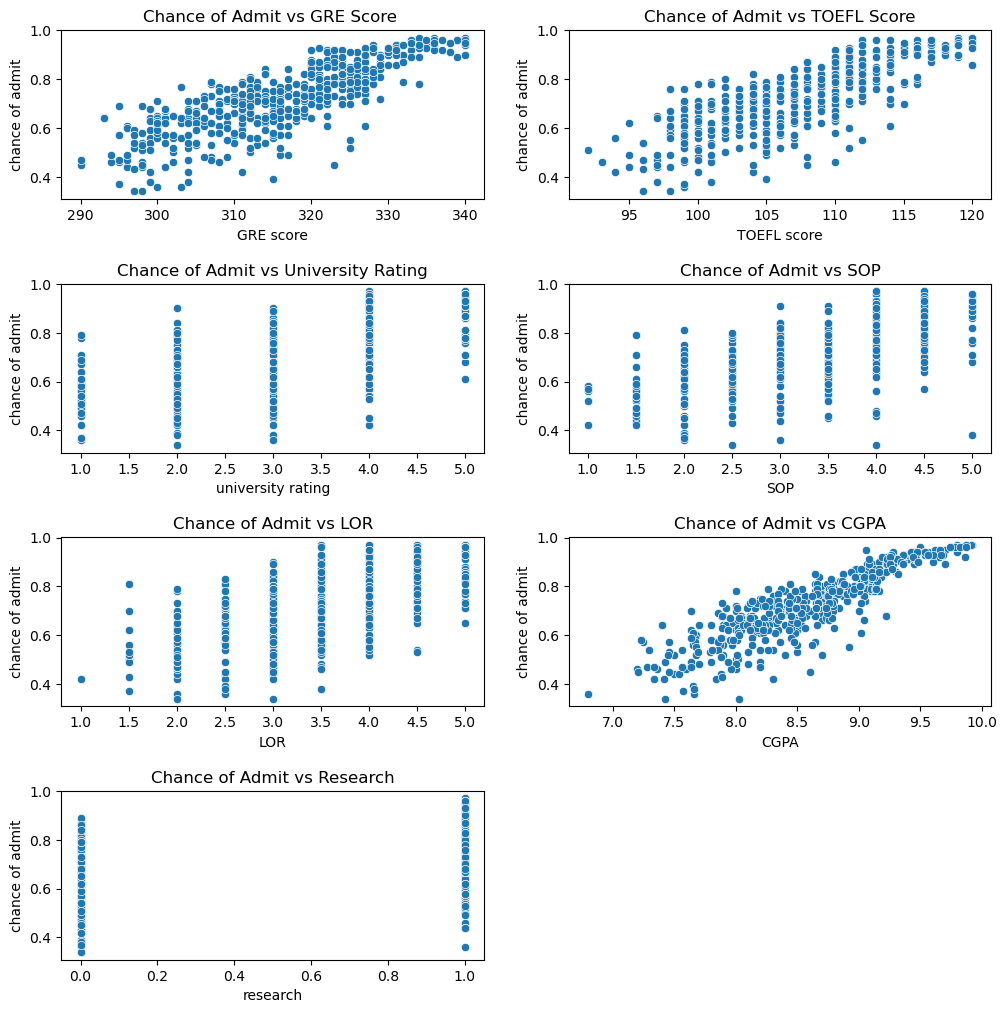

In [33]:
plt.figure(figsize = (12,45))

plt.subplot(14,2,1)
sns.scatterplot(data = df, x ='GRE score', y='chance of admit')
plt.title('Chance of Admit vs GRE Score ')

plt.subplot(14,2,2)
sns.scatterplot(data = df, x ='TOEFL score', y='chance of admit')
plt.title('Chance of Admit vs TOEFL Score')

plt.subplot(14,2,3)
sns.scatterplot(data = df, x ='university rating', y='chance of admit')
plt.title('Chance of Admit vs University Rating')

plt.subplot(14,2,4)
sns.scatterplot(data = df, x ='SOP', y='chance of admit')
plt.title('Chance of Admit vs SOP')

plt.subplot(14,2,5)
sns.scatterplot(data = df, x ='LOR', y='chance of admit')
plt.title('Chance of Admit vs LOR')

plt.subplot(14,2,6)
sns.scatterplot(data = df, x ='CGPA', y='chance of admit')
plt.title('Chance of Admit vs CGPA')

plt.subplot(14,2,7)
sns.scatterplot(data = df, x ='research', y='chance of admit')
plt.title('Chance of Admit vs Research')

######################################################################

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Linear relationship between independent & dependent variables is observed.

#### 4. Heteroskedasticity 

In [34]:
errs = y_test - y_pred

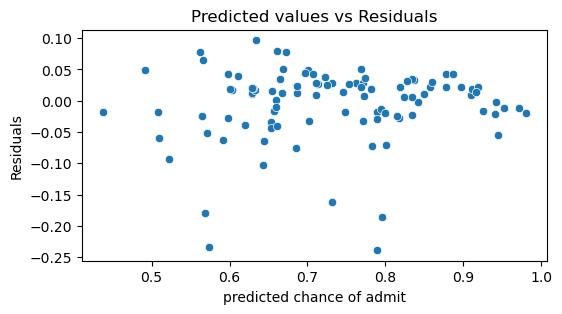

In [35]:
plt.figure(figsize = (6,3))
sns.scatterplot(x=y_pred,y=errs)
plt.xlabel("predicted chance of admit")
plt.ylabel("Residuals")
plt.title("Predicted values vs Residuals")
plt.show()

In [36]:
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y_train, X_train_scaled)
lzip(name, test)

[('F statistic', 1.0356040797105484), ('p-value', 0.40412193236749966)]

From the goldfeld-quandt test: F Statistic comes out to be 1.04 => Implying minimal difference in variance between groups. p-value of 0.405 indicates that this difference is statistically significant at conventional levels of significance (e.g., 0.05).

Therefore, we accept the null hypothesis of homoscedasticity, and conclude that there is no strong evidence of heteroscedasticity in the data.


#### 5. Normality of Residuals

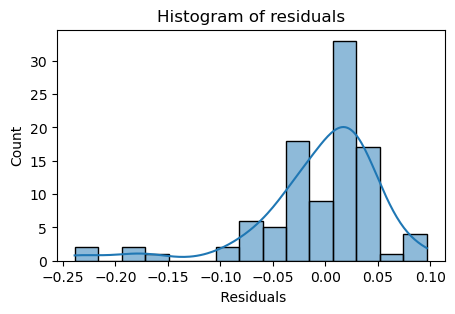

In [37]:
plt.figure(figsize = (5,3))
sns.histplot(errs, kde = True)
plt.xlabel(" Residuals")
plt.title("Histogram of residuals")
plt.show()

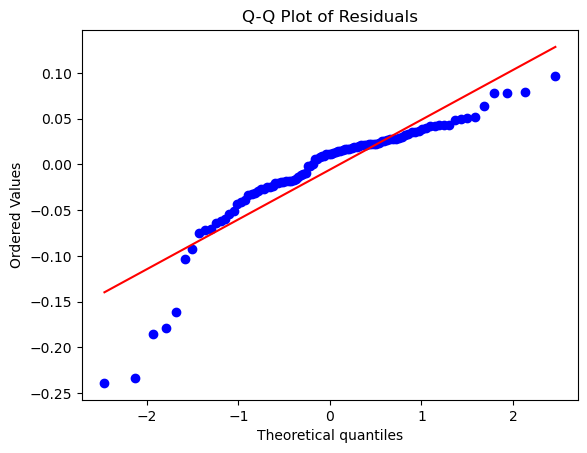

In [38]:
stats.probplot(errs, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

In [39]:
res = stats.shapiro(errs)
print ('Statistic:', res.statistic) 
print ('pvalue:', res.pvalue, '\n')

if res.pvalue < 0.05:
    print ('we reject the null hypothesis Ho, residuals are not normally distributed')
else:
    print ('we accept the null hypothesis Ho, residuals are normally distributed')

Statistic: 0.8361669778823853
pvalue: 3.776973844793474e-09 

we reject the null hypothesis Ho, residuals are not normally distributed


### Evaluation of Model's performnace

In [40]:
r2_train = model.score(X_train_scaled, y_train)
r2_test = model.score(X_test_scaled, y_test)
print('R squared score for train data', r2_train)
print('R squared score for test data', r2_test)

R squared score for train data 0.8215099192361265
R squared score for test data 0.8208741703103732


In [41]:
n, d = X_test.shape
adj_r2 = 1 - ((1- r2_test)*(n-1)/(n-d-1))
print('Adjusted R squared score:',adj_r2)

Adjusted R squared score: 0.8072450310948581


In [42]:
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
MAPE = mean_absolute_percentage_error(y_test, y_pred)

print('MAE:', MAE)
print('MSE:', MSE)
print('MAPE:', MAPE)

MAE: 0.040200193804157944
MSE: 0.003459098897136383
MAPE: 0.06616338697338972


### Polynomial Regression (Additional section)

In [43]:
# Defining our performance metric

def adj_r(r_sq,X,Y):
  adj_r2 = (1 - ((1-r_sq)*(len(Y)-1))/(len(Y)-X.shape[1]-1) )
  return adj_r2

In [44]:
X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=1)

In [45]:
X_train.shape

(300, 7)

In [46]:
X_val.shape

(100, 7)

In [47]:
X_test.shape

(100, 7)

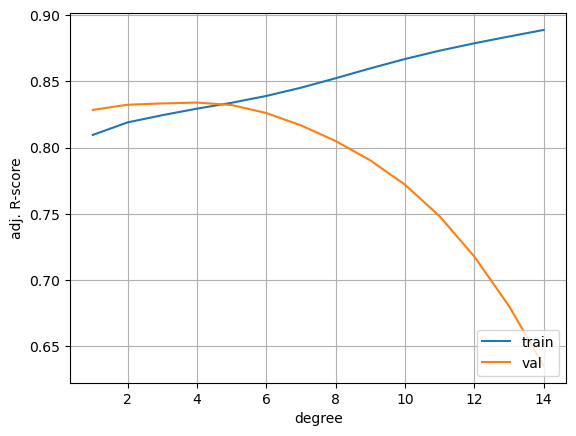

In [48]:
max_degree = 15 # max polynomial degree

train_scores = []
val_scores = []
degrees = []

scaler = StandardScaler()

for degree in range(1, max_degree):

  polyreg_scaled = make_pipeline(PolynomialFeatures(degree), scaler, Ridge())
  polyreg_scaled.fit(X_train, y_train)

  train_score = adj_r(X = X_train, Y = y_train, r_sq = polyreg_scaled.score(X_train, y_train))
  val_score= adj_r(X = X_val, Y = y_val, r_sq = polyreg_scaled.score(X_val, y_val))

  train_scores.append(train_score)
  val_scores.append(val_score)
  degrees.append(degree)

plt.figure()
plt.plot(list(range(1, max_degree)), train_scores, label="train")
plt.plot(list(range(1, max_degree)), val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("degree")
plt.ylabel("adj. R-score")
plt.grid()
plt.show()


In [49]:
max_ind_val_score = np.argmax(val_scores)

In [50]:
optimum_deg = degrees[max_ind_val_score]

In [51]:
train_scores = []
val_scores = []

lambda_list = np.arange(0.01, 20, 0.1) # [0.01, 0.1, 1, 5, 10]

for rate in lambda_list:
  polyreg_scaled = make_pipeline(PolynomialFeatures(optimum_deg), StandardScaler(), Ridge(alpha=rate))
  polyreg_scaled.fit(X_train, y_train)

  train_score = adj_r(X =X_train, Y =y_train, r_sq =polyreg_scaled.score(X_train, y_train))
  val_score= adj_r(X =X_val, Y =y_val, r_sq =polyreg_scaled.score(X_val, y_val))

  train_scores.append(train_score)
  val_scores.append(val_score)

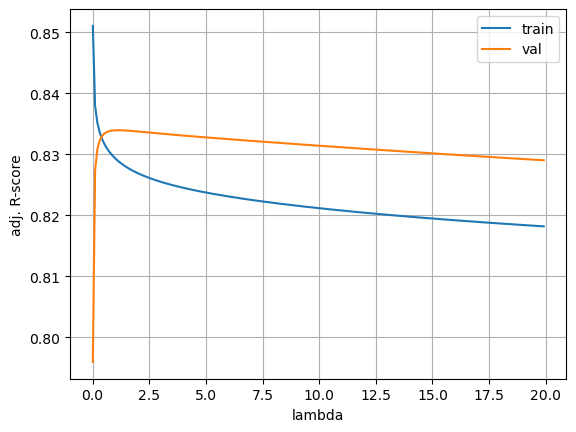

In [52]:
plt.figure()
plt.plot(lambda_list, train_scores, label="train")
plt.plot(lambda_list, val_scores, label="val")
plt.legend()
plt.xlabel("lambda")
plt.ylabel("adj. R-score")
plt.grid()
plt.show()

In [53]:
max_ind_val_score =  np.argmax(val_scores)

In [54]:
optimum_lambda = lambda_list[max_ind_val_score]

In [55]:
final_model = make_pipeline(PolynomialFeatures(optimum_deg), StandardScaler(), Ridge(alpha=optimum_lambda))

final_model.fit(X_train, y_train)


train_score = adj_r(X = X_train, Y = y_train, r_sq = final_model.score(X_train, y_train))
print(f'Training Score = {train_score}')

val_score = adj_r(X = X_val, Y = y_val, r_sq = final_model.score(X_val, y_val))
print(f'Validation Score = {val_score}')

Training Score = 0.8289567655091042
Validation Score = 0.8339506580539611


In [56]:
# Reporting this as the final score

test_score = adj_r(X = X_test, Y = y_test, r_sq = final_model.score(X_test, y_test))
print(f'Testing Score = {test_score}')

Testing Score = 0.8098141698820432


Adjusted R- score for test data remains almost same after using Polynomial Regression though training score and validation score improves.

### Insights and Recommendations

Based on the analysis of the factors influencing graduate admissions to Ivy League colleges, the following insights and recommendations can be drawn:

#### Key Findings

1. **Significant Predictors of Admission Chances:**
   - **GRE Score:** Higher GRE scores are positively correlated with higher chances of admission. This is justified by the fact that GRE scores reflect the applicants' verbal and quantitative abilities.
   - **CGPA:** A higher CGPA is another strong predictor, indicating consistent academic performance over time.
   - **TOEFL Score:** Similar to GRE scores, higher TOEFL scores are indicative of better English proficiency, which is crucial for admission to English-speaking institutions.
   - **LOR (Letter of Recommendation):** Strong LORs are crucial for admissions, particularly for applicants with research experience. These letters provide qualitative evidence of an applicant’s capabilities and potential.
   - **SOP (Statement of Purpose):** While not as strongly correlated with CGPA, a compelling SOP can significantly boost admission chances by showcasing the applicant’s goals, motivation, and suitability for the program.

2. **Interrelationships Among Predictors:**
   - **GRE and TOEFL Scores:** These scores are positively correlated, which makes sense as both assess language proficiency to some extent.
   - **CGPA and GRE Scores:** There is a slight positive correlation, suggesting that academically strong students tend to perform well in standardized tests.
   - **LOR and Research Experience:** Good LORs often correlate with research experience, as supervisors who interact closely with students can provide stronger recommendations.

3. **Model Performance:**
   - **Adjusted R-Squared:** The model explains approximately 80.7% of the variance in the admission chances, indicating a good fit.
   - **Error Metrics:** Low MAE (0.0402) and MSE (0.0035) values suggest that the model predictions are quite accurate.
   - **Residual Analysis:** The mean of residuals is close to zero, confirming the model's unbiased predictions. The Goldfeld-Quandt test indicates homoscedasticity, meaning the variance of errors is constant.

4. **Normality of Residuals:** The residuals are not normally distributed, as indicated by the p-value. However, this does not necessarily invalidate the model but suggests that there might be some non-linearity or other factors not captured by the model.

### Recommendations

1. **Emphasize High GRE and TOEFL Scores:**
   - **Preparation Courses:** Jamboree should continue to offer and possibly expand its preparation courses for GRE and TOEFL, as high scores in these exams are crucial for admissions.
   - **Mock Tests and Practice Sessions:** Regular mock tests and practice sessions can help students improve their scores.

2. **Strengthen CGPA:**
   - **Academic Support:** Provide academic support and tutoring to help students maintain a high CGPA throughout their undergraduate studies.
   - **Workshops on Time Management and Study Techniques:** Conduct workshops to teach effective study habits and time management skills.

3. **Enhance Quality of LORs and SOPs:**
   - **Guidance on LORs:** Offer workshops and one-on-one sessions to guide students on how to obtain strong letters of recommendation. This includes advice on choosing the right referees and providing them with necessary information.
   - **SOP Writing Services:** Provide services to help students craft compelling statements of purpose. This could include brainstorming sessions, writing workshops, and personalized feedback.

4. **Leverage Research Experience:**
   - **Research Opportunities:** Facilitate opportunities for students to engage in research projects. Collaborate with universities and research institutes to provide internships and research assistant positions.
   - **Mentorship Programs:** Develop mentorship programs where experienced researchers can guide students, enhancing their research skills and improving their chances of obtaining strong LORs.
   

5. **Continuous Monitoring and Improvement:**

   - **Feedback Mechanisms:** Implement feedback mechanisms to continuously assess and improve the preparation services offered.
   - **Data-Driven Insights:** Regularly analyze student performance data to identify areas of improvement and adjust the support services accordingly.